In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import input_data


%matplotlib inline



C:\Users\ben\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = input_data.read_data_sets(train_dir='.')

Extracting .\train-images-idx3-ubyte.gz
Extracting .\train-labels-idx1-ubyte.gz
Extracting .\t10k-images-idx3-ubyte.gz
Extracting .\t10k-labels-idx1-ubyte.gz


In [3]:
mnist.train.images[0].shape

(784,)

In [4]:
def plot_single_number(image_array):
    """
    image_array is the array that represents a
    single mnist image. it has shape (784, )
    and needs to be reshaped.
    """
    X = image_array
    X = X.reshape([28, 28]);
    plt.figure(figsize=(2, 2))
    plt.gray()
    plt.axis('off')
    plt.imshow(X)
    plt.show()

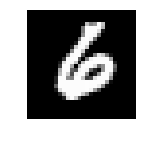

In [5]:
plot_single_number(mnist.train.images[99])

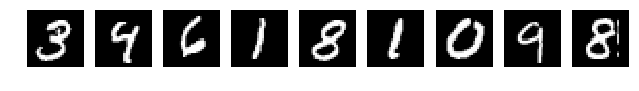

In [6]:
fig = plt.figure(figsize=(12,12))

for i in range(1, 10):
    ax = fig.add_subplot(1, 10, i)
    X = mnist.train.images[i]
    X = X.reshape([28, 28])
    ax.axis('off')
    ax.imshow(X)


In [7]:
mnist.train.labels[1:10]

array([3, 4, 6, 1, 8, 1, 0, 9, 8], dtype=uint8)

In [8]:
print(np.max(mnist.train.images[0]))
print(np.min(mnist.train.images[0]))


0.9960785
0.0


In [9]:
def one_hot_encode_numbers(labels):
    
    if isinstance(labels, np.uint8):
        num_labels = 1
        labels = [labels]
    else:
        num_labels = labels.shape[0]
        
    one_hots = np.zeros(shape=(num_labels, 10))
    
    for i in range(num_labels):
        one_hots[i, labels[i]]=1

    return one_hots

In [10]:
abc = mnist.train.labels[1100:1109]
print(abc)
one_hot_encode_numbers(abc)

[9 4 6 0 1 2 3 4 1]


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [19]:
mnist.train.images[0:3][0].reshape(28, 28).shape
# [i for i in 1]

(28, 28)

In [12]:
def reshape_images(images):
    """
    images is a np array of n images
    each with size (784,) that need
    to be reshaped
    """
    # if it doesn't have a second dimension, it's a single image
    try:
        images.shape[1]
    except:
        return images.reshape(28, 28)
    
    reshaped = np.stack([images[i].reshape(28, 28) for i in range(images.shape[0])])

    return reshaped
    
reshape_images(mnist.train.images[0:3]).shape


(3, 28, 28)

In [22]:
print(mnist.train.images[0].shape)
reshape_images(mnist.train.images[0]).shape

(784,)


(28, 28)

In [13]:
print("number of training examples = " + str(mnist.train.images.shape[0]))
print("number of validation examples = " + str(mnist.validation.images.shape[0]))
print("number of test examples = " + str(mnist.test.images.shape[0]))
print("Input images are of size = " + str(mnist.train.images[0].reshape(28,28).shape))

number of training examples = 55000
number of validation examples = 5000
number of test examples = 10000
Input images are of size = (28, 28)


In [14]:
aaa = np.random.normal(scale=0.01, size=(3,3))
print(aaa)
def relu(num):
    return np.max([num,0])
relu_layer = np.vectorize(relu)

#test
relu_layer(aaa)

[[ 0.00607914  0.00945827  0.00224704]
 [ 0.01603524  0.01159208  0.01133282]
 [ 0.0041813  -0.01215105 -0.01571325]]


array([[0.00607914, 0.00945827, 0.00224704],
       [0.01603524, 0.01159208, 0.01133282],
       [0.0041813 , 0.        , 0.        ]])

In [15]:
aaa = np.random.normal(scale=0.01, size=(3,3))
print(aaa)

def max_pool(grid):
    return np.max(grid)

# test
max_pool(aaa)

[[ 0.00290424  0.02160081  0.00927182]
 [ 0.0110412   0.00685473 -0.01453024]
 [-0.00449832 -0.003817    0.01055907]]


0.0216008125782769

In [201]:
# 

def softmax(numbers):
    a = np.exp(numbers)
    return a/np.sum(a)
        
np.round(softmax(np.exp([1, 2, 0, -1])), 3)

array([0.009, 0.988, 0.002, 0.001])

In [185]:
# np.sum(np.multiply(np.array([1,2,3]), np.array([1,2,3])))
# 0 false, 1 true
# reshape_images(mnist.train.images[0])[3, ]
x = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
# print(x)
x[0:(0+2), 0:2]
x = np.arange(90)
np.multiply(x[9*9:(9*9+9)],x[9*9:(9*9+9)])

array([6561, 6724, 6889, 7056, 7225, 7396, 7569, 7744, 7921])

In [203]:
class conv_net(object):
    """
    class for a convolutional neural network.
    
    layers:
    input layer 
                - the image, size (28, 28)
    conv layer 
                - weights W1 
                - padding 'VALID', stride 2
                - size(4, 4)
                - output size (12, 12)
    relu layer 
                - output size (12, 12)
    max_pool
                - padding 'VALID', stride 1
                - size (4, 4)
                - output will be (8, 8)
    conv layer 
                - weights W2 
                - padding 'VALID', stride 2
                - size(2, 2)
                - output size (4, 4)
    relu layer
                - output size (4, 4)
    max_pool
                - padding 'VALID', stride 1
                - size (2, 2)
                - output size (3, 3)
    reshape layer
                - reshape to size (9,)
    fully connected layer
                - weights W3
                - size (90)
                - output size (10,)
    soft_max
                - output size (10,)

    """
    #def __init__(self):
        # anything here??
    
    def set_seed(self, seed):
        np.random.seed(seed)
    
    def initialise_weights(self):
        self.W1 = np.random.normal(scale=0.01, size=(4,4))
        self.W2 = np.random.normal(scale=0.01, size=(2,2))
        self.W3 = np.random.normal(scale=0.01, size=(90,))
    
    def forward_pass_one_image(self, image, print_layers=False):
        
        if print_layers:
            fig = plt.figure(figsize=(12,12))
                
        def add_ax(im, title, subplot_num, run=print_layers):
            if run:
                ax = fig.add_subplot(1, 10, subplot_num)
                ax.axis('off')
                ax.set_title(title, fontdict={'size':8})
                ax.imshow(im)
             
        assert image.shape==(784,)
        
        reshaped_image = reshape_images(image)
    
        add_ax(reshaped_image, 'reshaped', 1)
                
        assert reshaped_image.shape==(28, 28)
        
        # first conv layer
        l1 = np.zeros(shape=(12, 12))
        for i in range(12):
            for j in range(12):
                l1[i, j] = np.sum(np.multiply(self.W1, reshaped_image[2*i:(2*i+4), 2*j:(2*j+4)]))
                
        add_ax(l1, 'conv', 2)
                
        # relu layer
        l2 = relu_layer(l1)
        
        assert l2.shape==(12, 12)
        
        add_ax(l2, 'relu', 3)
        
        # max pool
        l3 = np.zeros(shape=(8, 8))
        for i in range(8):
            for j in range(8):
                l3[i, j] = max_pool(l2[i:(i+4), j:(j+4)])
        
        add_ax(l3, 'max pool', 4)
        
        assert l3.shape==(8, 8)
        
        # conv
        l4 = np.zeros(shape=(4, 4))
        for i in range(4):
            for j in range(4):
                l4[i, j] = np.sum(np.multiply(self.W2, l3[2*i:(2*i+2), 2*j:(2*j+2)]))
        
        add_ax(l4, 'conv', 5)
        
        # relu
        l5 = relu_layer(l4)
        
        assert l5.shape==(4, 4)
        
        add_ax(l5, 'relu', 6)
        
        # max pool
        l6 = np.zeros(shape=(3, 3))
        for i in range(3):
            for j in range(3):
                l6[i, j] = max_pool(l5[i:(i+2), j:(j+2)])
        
        add_ax(l6, 'max pool', 7)
        
        # reshape
        l7 = np.reshape(l6, (9,))
        
        assert l7.shape==(9,)        
        
        # fully connected layer
        l8 = np.zeros(shape=(10,))
        for i in range(10):
            l8[i] = np.sum(np.multiply(l7, self.W3[9*i:(9*i+9)]))
        
        l9 = softmax(l8)
        
        assert l9.shape==(10,)
        
        
        return l9
        

array([0.10000179, 0.10000018, 0.09999814, 0.1000007 , 0.09999965,
       0.10000087, 0.10000067, 0.09999872, 0.1       , 0.09999928])

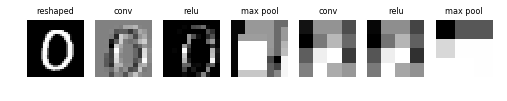

In [208]:
qq = conv_net()
qq.set_seed(52489)
qq.initialise_weights()
qq.W1
# plot_single_number(mnist.train.images[190])
qq.forward_pass_one_image(mnist.train.images[10], print_layers=True)


In [ ]:
# create network
np.random.seed(10)
# structure will be
#
# CONV2D: stride of 1, padding 'SAME' (padding of 1 around)
# so output will be (28, 28)
Z1 = np.random.normal(scale=0.01, size=(3,3))
# RELU 
# applies max(num, 0) to each element, output (28, 28)
# apply to Z1
A1 = relu_layer(Z1)
# MAXPOOL: window 4x4, sride 4, padding 'SAME', (2 around)
# out_height = ceil(float(in_height) / float(strides[1]))
# out_width = ceil(float(in_width) / float(strides[2]))
# so output will be (7, 7)
P1 = max_pool(A1)
# CONV2D: filters W2, stride 1, padding 'SAME'
# grid of 3 by 3, padding of 1 around, output will be (7, 7)
Z2 = np.random.normal(scale=0.01, size=(3,3))
# RELU, again output will be (7, 7)
A2 = relu_layer(Z2)
# MAXPOOL: window 3x3, stride 2, padding 'SAME' (padding of 1)
# output size (4, 4)
P2 = None
# FLATTEN
# reshape into 1 dimension
# output 16
P2 = None # np.random.normal(scale=0.01, size=(16,))
# FULLY-CONNECTED without non-linear activation function (not not call softmax).
# 6 neurons in output layer. Hint: one of the arguments should be "activation_fn=None" 
Z3 = None
